In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=2)

# The kernel trick

Quickly revise linear regression, we have some input locations $X$ and outputs $\mathbf{y}$. We want to predict a given $y_i$ from a given input $\mathbf{x}_i$. We assume the equation will be linear, in that it is simply a weighted sum of the input values $y_i \approx \sum_{i=1}^D{w_i x_i}$. We extend our input vector to allow us to model more complicated functions. For example, if our inputs were $X=[-2,-1,0,1,2]^\top$ and our outputs were $y=[5,2,1,2,5]$ we will fail to produce a good estimate with just a weighted scaling of $X$ (straight line) and will do better if we add additional columns to our $X$, such as $X^0$ and $X^2$.

For each input column we will need to find an appropriate weight. Let's quickly revise how we find this.

We want to minimise the prediction error. Typically one minimises the (sum) squared error (the reason for this is due to assumptions around Gaussian noise). Let us write this error:

$\epsilon = \sum_{i=1}^N (y_i - \mathbf{x_i} . w)^2 = (\mathbf{y} - X \mathbf{w})^\top (\mathbf{y} - X \mathbf{w})$

we want to find $w$ that minimises $e$, using rule #84 from the matrix cookbook,

$\frac{\partial \epsilon}{\partial w} = -2 X^\top (\mathbf{y} - X \mathbf{w})$

setting equal to zero and rearranging to solve for $w$,

$0 = X^\top (\mathbf{y} - X \mathbf{w})$

$0 = X^\top \mathbf{y} - X^\top X \mathbf{w}$

$X^\top \mathbf{y} = X^\top X \mathbf{w}$

$(X^\top X)^{-1} X^\top \mathbf{y} = (X^\top X)^{-1} X^\top X \mathbf{w}$

$w = (X^\top X)^{-1} X^\top \mathbf{y}$

Side note: We might introduce an additional term into the inverse to regularise the function. This is equivalent to a Bayesian interpretation that we have a prior on $w$ that the values will be more likely to be zero.

Here's a quick demo:

We start with just X:

(0, 9)

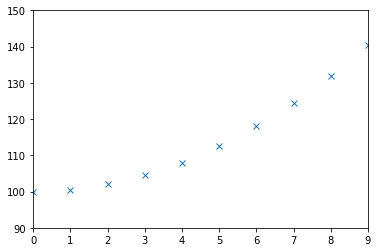

In [2]:
#simulated data:
X = np.array([[0,1,2,3,4,5,6,7,8,9]]).T
y = 100+0.5*X**2
plt.plot(X[:,0],y[:,0],'x')
plt.ylim([90,150])
plt.xlim([0,9])

w:
[[19.34]]
Mean Squared Error:
2570.989473815479


(0, 9)

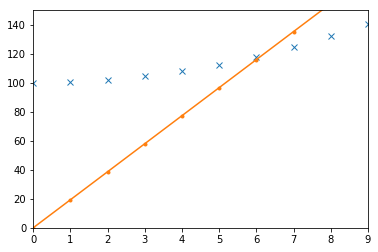

In [3]:
D = X.shape[1]
w = np.linalg.inv(X.T@X+1e-3*np.eye(D))@X.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-X@w)**2))
plt.plot(X[:,0],y[:,0],'x')
plt.plot(X[:,0],X@w,'.-')
plt.ylim([0,150])
plt.xlim([0,9])

We can't fit the straight line as we don't have a term that allows us to shift the prediction up or down. This can be solved by adding ones to the design matrix, X:

New design matrix
[[0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [8 1]
 [9 1]]
w:
[[ 4.51]
 [93.97]]
Mean Squared Error:
13.200300440883447


(0, 9)

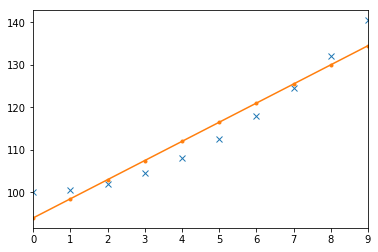

In [4]:
newX = np.c_[X,X**0]
print("New design matrix")
print(newX)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))
plt.plot(newX[:,0],y[:,0],'x')
plt.plot(newX[:,0],newX@w,'.-')
plt.xlim([0,9])

And adding a squared term to the design matrix,...

New design matrix
[[ 0  1  0]
 [ 1  1  1]
 [ 2  1  4]
 [ 3  1  9]
 [ 4  1 16]
 [ 5  1 25]
 [ 6  1 36]
 [ 7  1 49]
 [ 8  1 64]
 [ 9  1 81]]
w:
[[ 0.03]
 [99.94]
 [ 0.5 ]]
Mean Squared Error:
0.0006175101742486398


(0, 9)

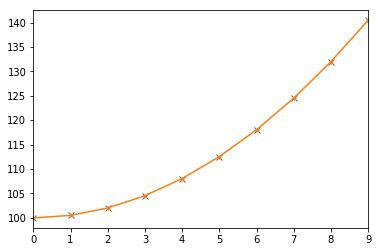

In [5]:
newX = np.c_[newX,newX[:,0]**2]
print("New design matrix")
print(newX)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))
plt.plot(newX[:,0],y[:,0],'x')
plt.plot(newX[:,0],newX@w,'.-')
plt.xlim([0,9])

We usually have a more complicated interesting dataset however...
Things get interesting when we start to consider a more complicated **basis**. For example rather than just a polynomial expansion, supposing we believe that there is probably just some sort of smoothish function...

In [6]:
X = np.linspace(0,23,24)[:,None]
y = np.array([[12,8,5,4,3,4,5,6,9,11,12,12,11,8,6,3,1,1,2,4,5,7,8,10]]).T
y = y - np.mean(y)

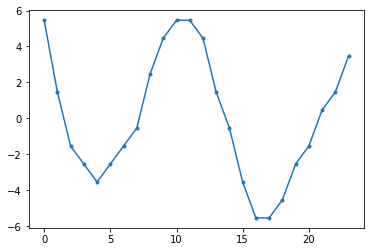

In [7]:
plt.plot(X,y,'.-')

Rather than just a polynomial function of $X$ we could pick something more interesting...

- a set of different frequency sinusoids?
- a set of guassian 'blobs' scattered along the x-axis?
- etc...

Trying these two in the following two examples:

I've also plotted the unscaled basis functions for the examples and have made predictions beyond the training data to see how it extrapolates.

New design matrix
[[ 0.    1.    0.    1.    0.    1.  ]
 [ 0.25  0.97  0.48  0.88  0.84  0.54]
 [ 0.48  0.88  0.84  0.54  0.91 -0.42]
 [ 0.68  0.73  1.    0.07  0.14 -0.99]
 [ 0.84  0.54  0.91 -0.42 -0.76 -0.65]
 [ 0.95  0.32  0.6  -0.8  -0.96  0.28]
 [ 1.    0.07  0.14 -0.99 -0.28  0.96]
 [ 0.98 -0.18 -0.35 -0.94  0.66  0.75]
 [ 0.91 -0.42 -0.76 -0.65  0.99 -0.15]
 [ 0.78 -0.63 -0.98 -0.21  0.41 -0.91]
 [ 0.6  -0.8  -0.96  0.28 -0.54 -0.84]
 [ 0.38 -0.92 -0.71  0.71 -1.    0.  ]
 [ 0.14 -0.99 -0.28  0.96 -0.54  0.84]
 [-0.11 -0.99  0.22  0.98  0.42  0.91]
 [-0.35 -0.94  0.66  0.75  0.99  0.14]
 [-0.57 -0.82  0.94  0.35  0.65 -0.76]
 [-0.76 -0.65  0.99 -0.15 -0.29 -0.96]
 [-0.89 -0.45  0.8  -0.6  -0.96 -0.28]
 [-0.98 -0.21  0.41 -0.91 -0.75  0.66]
 [-1.    0.04 -0.08 -1.    0.15  0.99]
 [-0.96  0.28 -0.54 -0.84  0.91  0.41]
 [-0.86  0.51 -0.88 -0.48  0.84 -0.55]
 [-0.71  0.71 -1.    0.   -0.01 -1.  ]
 [-0.51  0.86 -0.88  0.48 -0.85 -0.53]]
w:
[[ 1.37]
 [ 0.07]
 [-3.66]
 [ 2.88]
 [-0.2

(-10, 15)

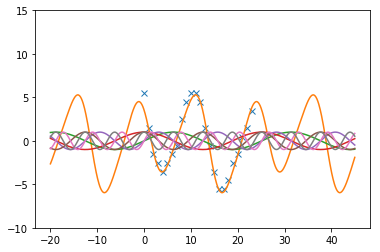

In [8]:
newX = np.c_[np.sin(X[:,0]/4),np.cos(X[:,0]/4),np.sin(X[:,0]/2),np.cos(X[:,0]/2),np.sin(X[:,0]),np.cos(X[:,0])]
print("New design matrix")
print(newX)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))
plt.plot(X[:,0],y[:,0],'x')
testX = np.linspace(-20,45,660)[:,None]
testXmat = np.c_[np.sin(testX[:,0]/4),np.cos(testX[:,0]/4),np.sin(testX[:,0]/2),np.cos(testX[:,0]/2),np.sin(testX[:,0]),np.cos(testX[:,0])]
plt.plot(testX[:,0],testXmat@w,'-')
plt.plot(testX[:,0],np.sin(testX[:,0]/4))
plt.plot(testX[:,0],np.cos(testX[:,0]/4))
plt.plot(testX[:,0],np.sin(testX[:,0]/2))
plt.plot(testX[:,0],np.cos(testX[:,0]/2))
plt.plot(testX[:,0],np.sin(testX[:,0]))
plt.plot(testX[:,0],np.cos(testX[:,0]))
plt.ylim([-10,15])

New design matrix
[[0.06 1.   0.06 0.   0.   0.   0.   0.  ]
 [0.02 0.89 0.17 0.   0.   0.   0.   0.  ]
 [0.   0.64 0.37 0.   0.   0.   0.   0.  ]
 [0.   0.37 0.64 0.   0.   0.   0.   0.  ]
 [0.   0.17 0.89 0.02 0.   0.   0.   0.  ]
 [0.   0.06 1.   0.06 0.   0.   0.   0.  ]
 [0.   0.02 0.89 0.17 0.   0.   0.   0.  ]
 [0.   0.   0.64 0.37 0.   0.   0.   0.  ]
 [0.   0.   0.37 0.64 0.   0.   0.   0.  ]
 [0.   0.   0.17 0.89 0.02 0.   0.   0.  ]
 [0.   0.   0.06 1.   0.06 0.   0.   0.  ]
 [0.   0.   0.02 0.89 0.17 0.   0.   0.  ]
 [0.   0.   0.   0.64 0.37 0.   0.   0.  ]
 [0.   0.   0.   0.37 0.64 0.   0.   0.  ]
 [0.   0.   0.   0.17 0.89 0.02 0.   0.  ]
 [0.   0.   0.   0.06 1.   0.06 0.   0.  ]
 [0.   0.   0.   0.02 0.89 0.17 0.   0.  ]
 [0.   0.   0.   0.   0.64 0.37 0.   0.  ]
 [0.   0.   0.   0.   0.37 0.64 0.   0.  ]
 [0.   0.   0.   0.   0.17 0.89 0.02 0.  ]
 [0.   0.   0.   0.   0.06 1.   0.06 0.  ]
 [0.   0.   0.   0.   0.02 0.89 0.17 0.  ]
 [0.   0.   0.   0.   0.   0.64 0.37

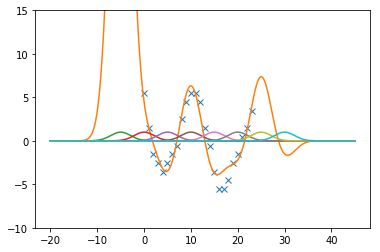

In [12]:
def gaussianblob(X,centre):
    ls = 3.0
    return np.exp(-(X-centre)**2/ls**2)
newX = np.c_[gaussianblob(X,-5),gaussianblob(X,0),gaussianblob(X,5),gaussianblob(X,10),gaussianblob(X,15),gaussianblob(X,20),gaussianblob(X,25),gaussianblob(X,30)]
print("New design matrix")
print(newX)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))
plt.plot(X[:,0],y[:,0],'x')
testX = np.linspace(-20,45,660)[:,None]
testXmat = np.c_[gaussianblob(testX,-5),gaussianblob(testX,0),gaussianblob(testX,5),gaussianblob(testX,10),gaussianblob(testX,15),gaussianblob(testX,20),gaussianblob(testX,25),gaussianblob(testX,30)]
plt.plot(testX[:,0],testXmat@w,'-')
plt.plot(testX[:,0],gaussianblob(testX[:,0],-5))
plt.plot(testX[:,0],gaussianblob(testX[:,0],0))
plt.plot(testX[:,0],gaussianblob(testX[:,0],5))
plt.plot(testX[:,0],gaussianblob(testX[:,0],10))
plt.plot(testX[:,0],gaussianblob(testX[:,0],15))
plt.plot(testX[:,0],gaussianblob(testX[:,0],20))
plt.plot(testX[:,0],gaussianblob(testX[:,0],25))
plt.plot(testX[:,0],gaussianblob(testX[:,0],30))
plt.ylim([-10,15]);

this might work with an input in one-dimension, but as the dimensionality goes up it will be increasingly difficult to fill the domain with all these blobs etc...

# The kernel trick

The first half of the trick is to notice that we can rewrite our expression for the weight in a slightly different way... using the woodbury matrix identity, we can write $\mathbf{w} = (X^\top X + \lambda I)^{-1} X^\top \mathbf{y}$ as $\mathbf{w} = X^\top (X X^\top + \lambda I)^{-1} \mathbf{y}$. (note $\mathbf{w}$ is a $D \times 1$ matrix).

In the former, we are multiplying $X^\top$ by $X$ - this is a $D \times N$ by an $N \times D$ matrix. The latter expression has $X^\top$ by $X$: this is a $N \times D$ by an $D \times N$.

How is this useful? There are two more steps, the first is to substitute this new expression for $\mathbf{w}$ into our equation for making predictions; specifically if we have a test points $X_*$ (shape $M \times D$, as it represents $M$ test points, each of $D$ dimensions) our prediction is $\mathbf{y}_* = X_* \mathbf{w}$.

$y_* = X_* X^\top (X X^\top + \lambda I)^{-1} \mathbf{y}$

**Kernel trick**: If we consider the computation of either of the $X X^\top$ inner products, we can see that each element of the resulting matrix will be a function of a pair of points from $X$. For example, element i,j of $(X X^\top)$ will equal: $\sum_{k=1}^D x_i^{(k)} x_j^{(k)}$. To make this more specific, let's consider the last example above, and consider the training points at 0 and 1:

In [13]:
newX[0:2]

array([[0.06, 1.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.89, 0.17, 0.  , 0.  , 0.  , 0.  , 0.  ]])

The $(0,1)$ element of the $X X^\top$ matrix is equal to:

In [14]:
np.sum(newX[0,:]*newX[1,:])

0.9064867818855197

This example of a series of gaussian blobs is intended to provide some measure of 'smoothness'. The trick is we can now replace this potentially massive sum with a single function. We need to make sure that the function is a valid inner product still. But for example we could instead just replace it with a exponentiated quadratic function directly of the distance between the two points.

Going through the above step-by-step.

We can write the expression for w differently:

In [15]:
#instead of
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T @ y
print("old w")
print(w)
#we can write:
N = newX.shape[0]
w = newX.T@np.linalg.inv(newX@newX.T+1e-3*np.eye(N)) @ y
print("new w")
print(w)

old w
[[54.67]
 [ 1.32]
 [-3.98]
 [ 6.82]
 [-3.98]
 [-2.43]
 [ 7.65]
 [-1.98]]
new w
[[54.67]
 [ 1.32]
 [-3.98]
 [ 6.82]
 [-3.98]
 [-2.43]
 [ 7.65]
 [-1.98]]


In [16]:
#we compute the values at test points with:
testXmat @ w;

In [19]:
# substituting in the dual-expression for w,
testXmat @ (newX.T@np.linalg.inv(newX@newX.T+1e-3*np.eye(N)) @ y);

In [20]:
preds = (testXmat @ newX.T) @ np.linalg.inv((newX@newX.T)+1e-3*np.eye(N)) @ y;

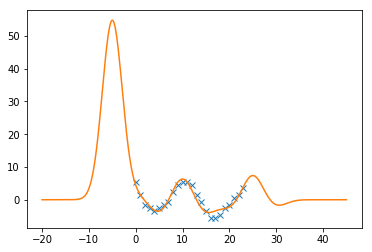

In [21]:
plt.plot(X,y,'x')
plt.plot(testX[:,0],preds)

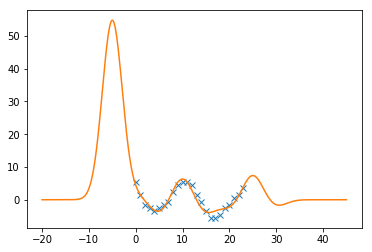

In [22]:
#we can compute the values of the testX @ newX.T matrix like this:
def compute_inner_product(aX,bX):
    result = np.zeros([aX.shape[0],bX.shape[0]])
    for i,a in enumerate(aX):
        for j,b in enumerate(bX):
            result[i,j] = np.sum(a*b)
    return result

plt.plot(X,y,'x')
plt.plot(testX[:,0],compute_inner_product(testXmat,newX) @ np.linalg.inv(compute_inner_product(newX,newX)+1e-3*np.eye(N)) @ y)

In [23]:
#we can replace the inner product calculation with our own function...

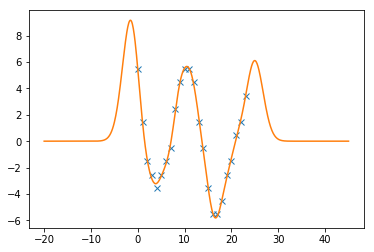

In [24]:
def compute_new_inner_product(aX,bX):
    result = np.zeros([aX.shape[0],bX.shape[0]])
    for i,a in enumerate(aX):
        for j,b in enumerate(bX):
            result[i,j] = gaussianblob(a[0],b[0])
    return result

plt.plot(X,y,'x')
plt.plot(testX[:,0],compute_new_inner_product(testX,X) @ np.linalg.inv(compute_new_inner_product(X,X)+1e-3*np.eye(N)) @ y)

# Random Fourier Features

First let's consider again the example of a fourier basis, but this time in 2d:

In [25]:
X = np.random.rand(10000,2)*10
y = np.cos(X[:,0]+X[:,1]*0.2)+np.sin(X[:,1]*0.3)+np.sqrt(X[:,0]+np.cos(X[:,1]/10.0))#+np.random.randn(len(X))
y = y+np.cos(X[:,0]*X[:,1]*0.3)
y = y - np.mean(y)
y = y[:,None]

Slices through the two-d square space at 0, 5 and 10:

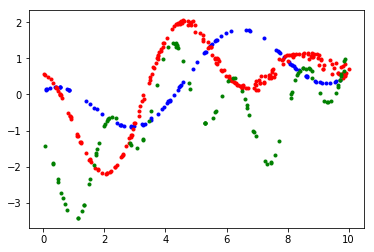

In [27]:
onslice = (X[:,1]>0) & (X[:,1]<0.1)
plt.plot(X[onslice,0],y[onslice,0],'.b')
onslice = (X[:,1]>4.9) & (X[:,1]<5.1)
plt.plot(X[onslice,0],y[onslice,0],'.r')
onslice = (X[:,1]>9.9) & (X[:,1]<10)
plt.plot(X[onslice,0],y[onslice,0],'.g')

Plot of the space in 2d:

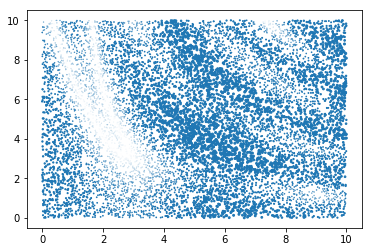

In [29]:
plt.scatter(X[:,0],X[:,1],(1+0.5*y[:,0])**2)

In [30]:
#X = X[::10,:]
#y = y[::10,:]

Here we try to fit, using 20 sinusoidal bases (5 scales, two directions, cos and sin)

New design matrix
[[ 0.85 -0.52  0.23 ... -0.83 -0.55 -0.84]
 [ 0.38  0.93  0.34 ...  1.   -0.73  0.69]
 [ 0.96  0.28  0.24 ... -0.11 -0.64 -0.77]
 ...
 [ 1.   -0.08  0.7  ...  0.23 -0.2   0.98]
 [ 0.99  0.11  0.72 ... -0.25 -0.34  0.94]
 [ 0.79 -0.61  0.97 ... -0.52  0.56 -0.83]]
w:
[[ 0.74]
 [ 0.43]
 [-1.2 ]
 [ 1.55]
 [-0.9 ]
 [-0.21]
 [-0.82]
 [-1.24]
 [-0.91]
 [ 0.28]
 [-0.14]
 [-0.28]
 [-0.01]
 [ 0.06]
 [-0.03]
 [ 0.06]
 [ 0.01]
 [-0.02]
 [ 0.02]
 [-0.03]]
Mean Squared Error:
0.66139194246973


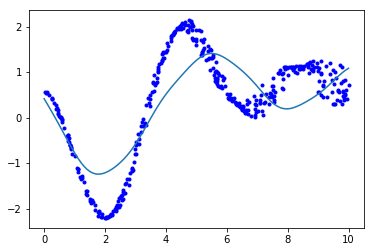

In [33]:
def gen_design_matrix(X):
    #we place the bases along the two axes
    newX = np.zeros([len(X),0])
    for scale in [4,2,1,0.5,0.25]:
        newX = np.c_[newX,np.sin(X[:,0]/scale),np.cos(X[:,0]/scale)]
        newX = np.c_[newX,np.sin(X[:,1]/scale),np.cos(X[:,1]/scale)]
    return newX

newX = gen_design_matrix(X)
    
print("New design matrix")
print(newX)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("w:")
print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))

onslice = (X[:,1]>4.8) & (X[:,1]<5.2)
plt.plot(X[onslice,0],y[onslice,0],'.b')

testX = np.linspace(0,10,100)[:,None]
testX = np.c_[testX,5*np.ones(100)]
testXmat = gen_design_matrix(testX)
plt.plot(testX[:,0],testXmat@w,'-')

But if we want to use a EQ (Gaussian) kernel... its Fourier transform is the same as the fn (but scaled).

We need to sample from this, we assume independent and equally scaled dimensions, so it is simply in random directions...

Mean Squared Error: 0.4091
Mean Squared Error: 0.9112
Mean Squared Error: 0.9569
Mean Squared Error: 0.7194
Mean Squared Error: 0.4542
Mean Squared Error: 0.4693
Mean Squared Error: 1.0111
Mean Squared Error: 0.8744
Mean Squared Error: 0.4128


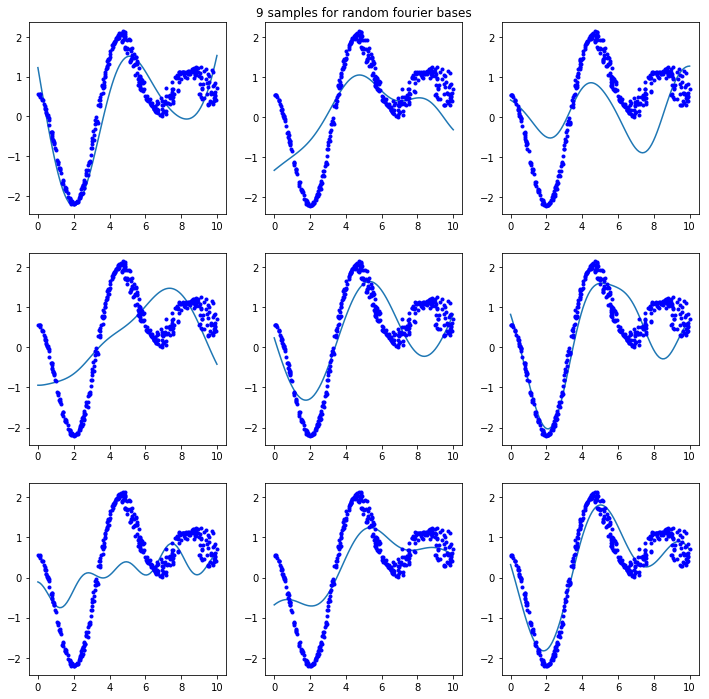

In [58]:
plt.figure(figsize=[12,12])
for testi in range(9):
    plt.subplot(3,3,testi+1)
    #sample random features, use same number of features as before!!!
    fourierdirections = np.random.randn(2,10)
    newX = np.c_[np.cos(X@fourierdirections),np.sin(X@fourierdirections)]
    if testi==1: plt.title('9 samples for random fourier bases')
    #print("New design matrix")
    #print(newX.shape)
    D = newX.shape[1]
    w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
    #print("w:")
    #print(w)
    print("Mean Squared Error: %0.4f" % np.mean((y-newX@w)**2))

    testX = np.linspace(0,10,100)[:,None]
    testX = np.c_[testX,5*np.ones(100)]
    testXmat = np.c_[np.cos(testX@fourierdirections),np.sin(testX@fourierdirections)]
    plt.plot(testX[:,0],testXmat@w,'-')
    onslice = (X[:,1]>4.8) & (X[:,1]<5.2)
    plt.plot(X[onslice,0],y[onslice,0],'.b')

Sometimes they happen to be good bases... but not that often.

Maybe I'm missing something in the paper to do this better?

It makes sense to compare to the EQ-basis equivalent...
just for reference, here's one with 5x6x6 bases:

New design matrix
(10000, 180)
Mean Squared Error:
0.10690349816997198


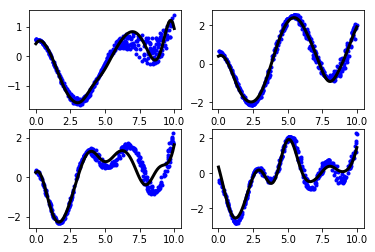

In [59]:
def gen_design_matrix(X,lses=[1],centreXs=[2,5,8],centreYs=[1,4,6,9]):
    #we place the bases along the two axes
    newX = np.zeros([len(X),0])
    for ls in lses:
        for centreX in centreXs:
            for centreY in centreYs:
                newX = np.c_[newX,np.exp(-((X[:,0]-centreX)**2 + (X[:,1]-centreY)**2)/ls**2)]
    return newX

newX = gen_design_matrix(X,lses=[1,2,3,4,5],centreXs = np.linspace(0,10,6),centreYs = np.linspace(0,10,6))
print("New design matrix")
print(newX.shape)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
#print("w:")
#print(w)
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))


for testslice in [2,4,6,8]:
    plt.subplot(2,2,int(testslice/2))
    onslice = (X[:,1]>testslice - 0.2) & (X[:,1]<testslice + 0.2)
    plt.plot(X[onslice,0],y[onslice,0],'.b')

    testX = np.linspace(0,10,100)[:,None]
    testX = np.c_[testX,testslice*np.ones(100)]
    testXmat = gen_design_matrix(testX,lses=[1,2,3,4,5],centreXs = np.linspace(0,10,6),centreYs = np.linspace(0,10,6))
    plt.plot(testX[:,0],testXmat@w,'-k',lw=3)

and now the same, but with just 12 bases:

In [60]:
newX = gen_design_matrix(X,lses=[3.0],centreXs = np.linspace(0,10,3),centreYs = np.linspace(0,10,4))
print("New design matrix")
print(newX.shape)
D = newX.shape[1]
w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
print("Mean Squared Error:")
print(np.mean((y-newX@w)**2))

New design matrix
(10000, 12)
Mean Squared Error:
0.8664960118606981


Maybe 2d wasn't enough to demonstrate, let's try 10d...

In [61]:
X = np.random.rand(10000,10)*10
y = np.zeros(len(X))
#np.random.seed(1)
for i in range(100):
    #sel = np.full(y.shape,True)
    #for j in range(1):
    a = np.random.rand()*30-10
    b = a+np.random.rand()*2
    #if a>b: b,a=a,b
    dim = np.random.randint(10)
    sel = (X[:,dim]>a) & (X[:,dim]<b)
    y[sel]+=1 #np.random.randn()*0.01
y = y[:,None]

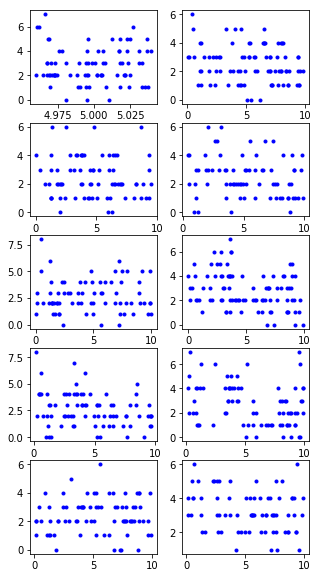

In [62]:
testslice = 5
plt.figure(figsize=[5,10])
for dim in range(10):
    plt.subplot(5,2,dim+1)
    onslice = (X[:,dim]>testslice - 0.04) & (X[:,dim]<testslice + 0.04)
    plt.plot(X[onslice,0],y[onslice,0],'.b')

/home/mike/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


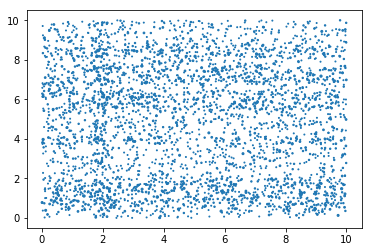

In [63]:
plt.scatter(X[:,4],X[:,2],y-3)

In [71]:
print("Series of Gaussian blobs as bases.")
print("Number of bases, MSE")
def gen_highdim_design_matrix(X,lses,centres):
    #we place the bases along the axes
    newX = np.zeros([len(X),0])
    for ls in lses:
        for centre in centres:
            newX = np.c_[newX,np.exp(-np.sum((X-centre)**2,1)/ls**2)]
    return newX

for ncentres in [1,2,4,8,16,32,64,128,256,512]:#
    centres = np.random.rand(int(ncentres),10)*10
    newX = gen_highdim_design_matrix(X,lses=[3,30.0],centres = centres)
    D = newX.shape[1]
    w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
    
    print("%5d %0.4f" % (D,np.mean((y-newX@w)**2)))

Series of Gaussian blobs as bases.
Number of bases, MSE
    2 2.4068
    4 2.3203
    8 2.1111
   16 1.9802
   32 1.9599
   64 1.9393
  128 1.8716
  256 1.7887
  512 1.7519
 1024 1.6884


In [72]:
print("A bunch of random features")
print("Number of bases, MSE")
#sample random features, use same number of features as before!!!
for n in [1,2,4,8,16,32,64,128,256,512]:#
    fourierdirections = 0.5*np.random.randn(10,n)/X.shape[1]
    newX = np.c_[np.cos(X@fourierdirections),np.sin(X@fourierdirections)]
    D = newX.shape[1]
    w = np.linalg.inv(newX.T@newX+1e-3*np.eye(D))@newX.T@y
    print("%5d %0.4f" % (D,np.mean((y-newX@w)**2)))


A bunch of random features
Number of bases, MSE
    2 2.2004
    4 2.2512
    8 2.1862
   16 2.0051
   32 1.9397
   64 1.8882
  128 1.8155
  256 1.7514
  512 1.5838
 1024 1.4887


The random fourier features perform better than the grid of Gaussian blobs. But not massively better. It's also quicker... but I'm guessing that's more code efficiency.

# Bochner's Theorem (start of...)

A quick numerical toy to demonstrate...

For a stationary kernel, $k(x-y)$, its fourier transform $p(\omega)$ is defined as,

$$k(x-y) = \int_{R^d} p(\omega) e^{j\omega^\top (x-y)}$$

The theorem states that its fourier transform is a proper probability distribution that allows us to write the covariance as:

$$E_\omega[\zeta_\omega(x) \zeta_\omega(y)^*]$$

where $\zeta(x) = e^{j \omega^\top x}$

I got a little derailed here...

just showing the fourier transform of a gaussian is a guassian:

In [139]:
delta = np.linspace(-5,5,100)
k = np.exp(-delta**2/2)

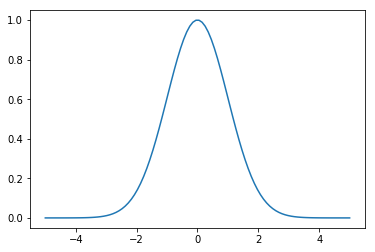

In [140]:
plt.plot(delta,k)

In [145]:
omegas = []
khat = []
for omega in np.linspace(-5,5,100):
    omegas.append(omega)
    khat.append(np.sum(k * np.exp(delta*1j*omega)))
omegas = np.array(omegas)
khat = np.array(khat)

/home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


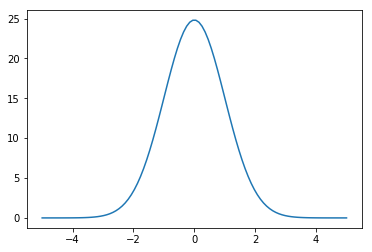

In [146]:
plt.plot(omegas, khat)

## Exponential kernel

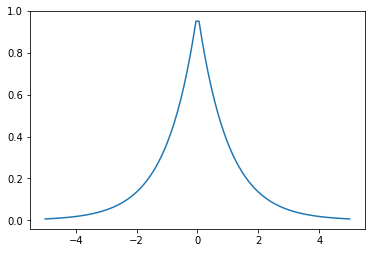

In [158]:
k = np.exp(-np.abs(delta))
plt.plot(delta,k)

In [159]:
omegas = []
khat = []
for omega in np.linspace(-5,5,100):
    omegas.append(omega)
    khat.append(np.sum(k * np.exp(delta*1j*omega)))
omegas = np.array(omegas)
khat = np.array(khat)

/home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


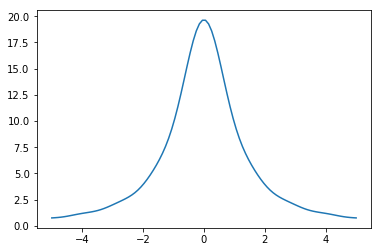

In [160]:
plt.plot(omegas, khat)

To do: Need to show that covariance can be written as expectation of product of expoentiated fourier series.